In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import statsmodels.api as sm

In [2]:
# Load your data
data=pd.read_csv("bankdata.csv")

In [3]:
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [4]:
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

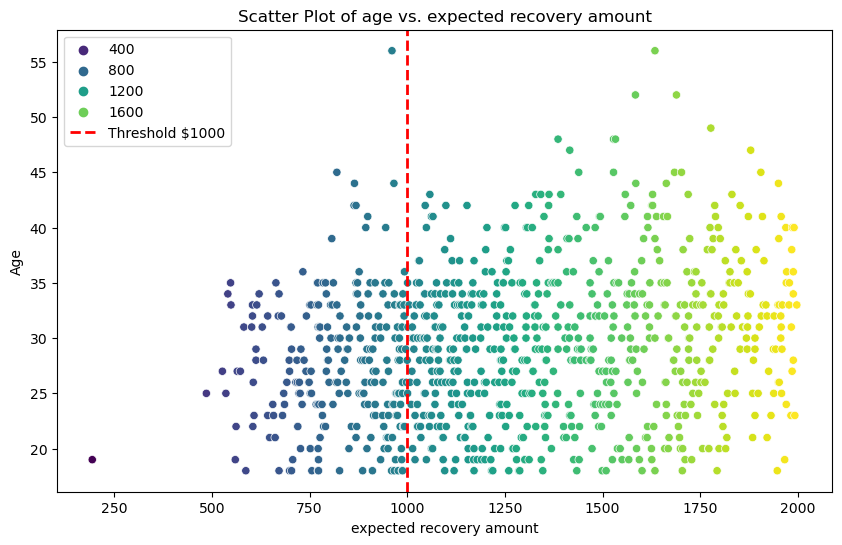

In [7]:
# Graphical exploratory data analysis

subset_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

plt.figure(figsize=(10, 6))

sns.scatterplot(x='expected_recovery_amount', y='age', data=subset_data, hue='expected_recovery_amount', palette='viridis')

plt.title('Scatter Plot of age vs. expected recovery amount')

plt.xlabel('expected recovery amount')

plt.ylabel('Age')

plt.axvline(x=1000, color='red', linestyle='--', linewidth=2, label='Threshold $1000')

plt.legend()

plt.show()

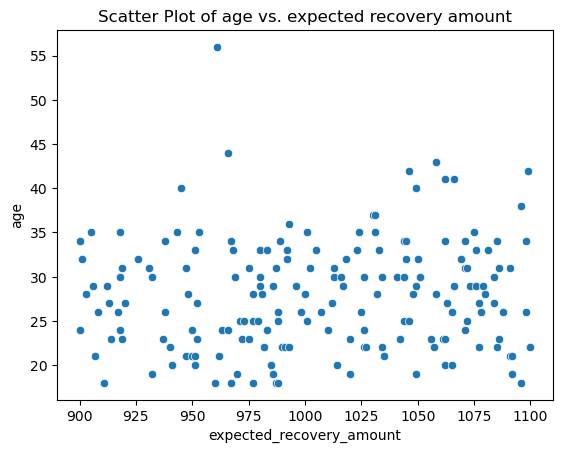

In [8]:
# Statistical test: age vs. expected recovery amount

sns.scatterplot(x='expected_recovery_amount', y='age', data=data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)])

plt.title('Scatter Plot of age vs. expected recovery amount')

plt.show()

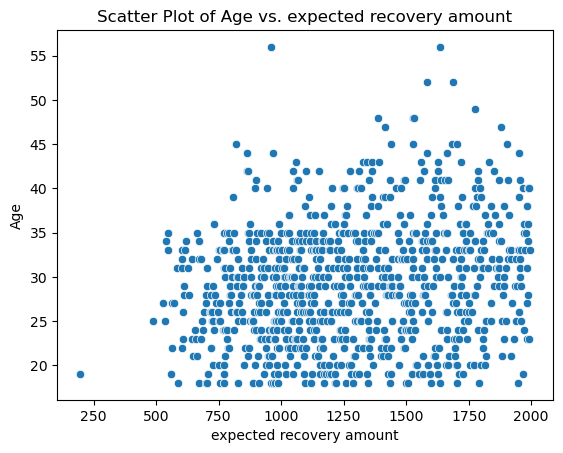

In [9]:
# Statistical test: age vs. expected recovery amount

sns.scatterplot(x='expected_recovery_amount', y='age', data=data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)])

plt.title('Scatter Plot of Age vs. expected recovery amount')

plt.xlabel('expected recovery amount')

plt.ylabel('Age')

plt.show()

In [13]:
# Exploratory graphical analysis: recovery amount

from scipy.stats import chi2_contingency

sex_test_range = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

contingency_table = pd.crosstab(sex_test_range['sex'], sex_test_range['expected_recovery_amount'])

chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square Test for Independence (sex vs. Expected Recovery Amount): p-value = {chi2_p_value}')


Chi-square Test for Independence (sex vs. Expected Recovery Amount): p-value = 0.3613198721671642


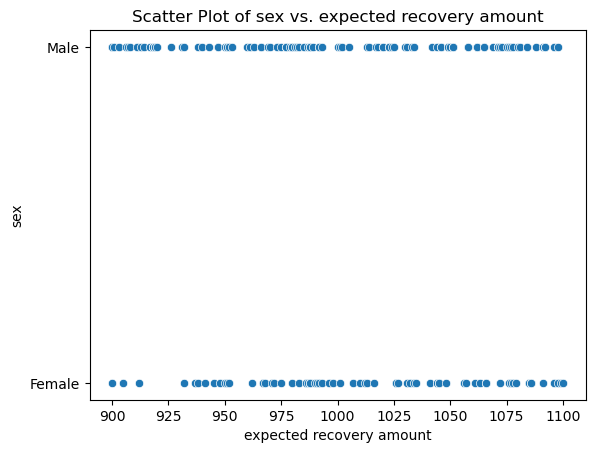

In [16]:
# Statistical test: sex vs. expected recovery amount

sns.scatterplot(x='expected_recovery_amount', y='sex', data=data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)])

plt.title('Scatter Plot of sex vs. expected recovery amount')

plt.xlabel('expected recovery amount')

plt.ylabel('sex')

plt.show()

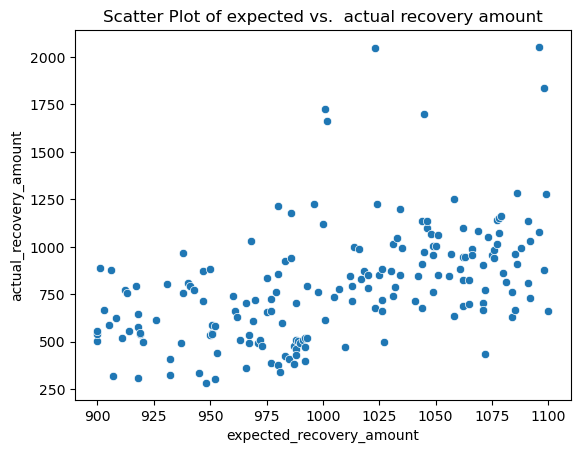

In [18]:
# Statistical test: age vs. expected recovery amount

sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)])

plt.title('Scatter Plot of expected vs.  actual recovery amount')

plt.show()

In [9]:
from scipy.stats import chi2_contingency

# Select the data within the specified range
sex_test_range = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Create a contingency table
contingency_table = pd.crosstab(sex_test_range['sex'], sex_test_range['expected_recovery_amount'])

# Perform the chi-square test
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-square Test for Independence (sex vs. expected Recovery Amount): p-value = {chi2_p_value}')




Chi-square Test for Independence (sex vs. expected Recovery Amount): p-value = 0.3613198721671642


In [20]:

model_no_threshold = sm.OLS(data['actual_recovery_amount'], sm.add_constant(data['expected_recovery_amount'])).fit()

print(model_no_threshold.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:56:22   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [21]:
#Regression modeling adding true threshold.

data['True_Threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)

model_with_threshold = sm.OLS(data['actual_recovery_amount'], sm.add_constant(data[['expected_recovery_amount', 'True_Threshold']])).fit()

print(model_with_threshold.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:58:07   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [23]:
# Regression modeling adjusting thewindow.

data_below_threshold_new = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1050)]

data_above_threshold_new = data[data['expected_recovery_amount'] > 1050]


data_below_threshold_new['Below_Threshold'] = 1

data_above_threshold_new['Below_Threshold'] = 0


data_combined_new = pd.concat([data_below_threshold_new, data_above_threshold_new], axis=0)


model_with_threshold_new = sm.OLS(data_combined_new['actual_recovery_amount'],
                                  sm.add_constant(data_combined_new[['expected_recovery_amount', 'Below_Threshold']])).fit()


print(model_with_threshold_new.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.802
Model:                                OLS   Adj. R-squared:                  0.802
Method:                     Least Squares   F-statistic:                     3311.
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                            22:02:12   Log-Likelihood:                -14815.
No. Observations:                    1635   AIC:                         2.964e+04
Df Residuals:                        1632   BIC:                         2.965e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_24584\1727053267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_below_threshold_new['Below_Threshold'] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_24584\1727053267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_above_threshold_new['Below_Threshold'] = 0
